# Housing Price Prediction using a Neural Network

## Objective
In this exercise, you will:
1. Create a synthetic dataset for housing prices based on a linear equation.
2. Build and train a simple neural network with one neuron to predict housing prices.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

---

## Step 2: Create a Synthetic Dataset
We will create a dataset for housing prices that follows the equation

$\text{price}$ = $\text{number of bedrooms}$ $\times  x$ + $\text{base price}$


In [47]:
# Number of samples
n_samples = 1000

# Generate random number of bedrooms between 1 and 5
bedrooms = np.random.randint(1, 6, n_samples)

# Constants for the equation
x = 0.5  # The price added per bedroom in onehundred thousands
base_price = 1  # Base price of a house in onehundred thousands

# Generate housing prices based on the equation
prices = bedrooms * x + base_price

# Create a DataFrame
df = pd.DataFrame({'bedrooms': bedrooms, 'price': prices})

# Show the first few rows
df.head()

,bedrooms,price
0,2,2.0
1,3,2.5
2,5,3.5
3,5,3.5
4,5,3.5


---

## Step 3: Visualize the Data
Plot the data to visualize the relationship between the number of bedrooms and the price.


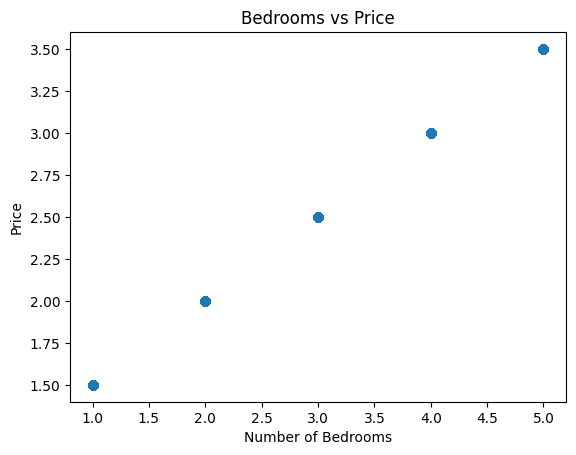

In [48]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.show()


---

## Step 4: Preprocess the Data
Split the data into features (`X`) and labels (`y`), and then into training and testing sets.


In [49]:
# Features and Labels
X = df[['bedrooms']]
y = df['price']

# TODO Split the data

# Load sklearn
from sklearn.model_selection import train_test_split

# X - independent, y - dependent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Validation
print(len(X_train), len(X_test), len(y_train), len(y_test))

800 200 800 200


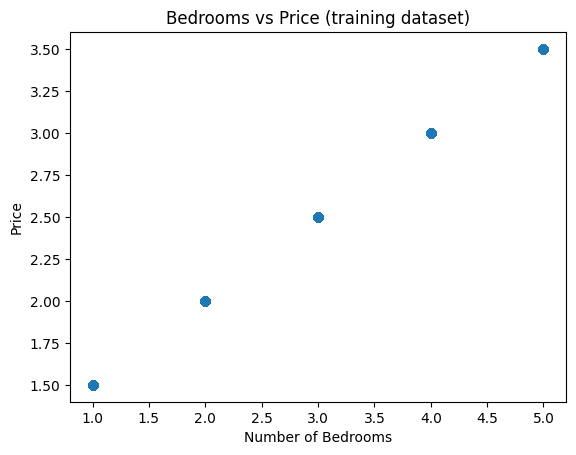

In [50]:
# Plot train set
plt.scatter(X_train, y_train)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price (training dataset)')
plt.show()


---

## Step 5: Build a Neural Network
Build a simple neural network with one neuron to predict the house prices.
Pick an optimizer and a loss function that suits this problem.


In [51]:
# TODO Create the model
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(2, activation="relu"))
model.add(tf.keras.layers.Dense(1))

# TODO Compile the model
model.compile(
    optimizer='adam',
    loss='MeanAbsoluteError',
    loss_weights=None,
    metrics=None,
    weighted_metrics=None,
    run_eagerly=False,
    steps_per_execution=1,
    jit_compile='auto',
    auto_scale_loss=True
)

# TODO print a Summary of the model
model.summary()



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

---

## Step 6: Train the Model
Train the model using the training data.


In [52]:
# TODO Train the model
model.fit(
    x=X_train,
    y=y_train,
    epochs=25,
    validation_data=(X_test, y_test),
)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 2.2320 - val_loss: 1.9723
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8731 - val_loss: 1.6252
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5390 - val_loss: 1.2775
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2063 - val_loss: 0.9288
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8425 - val_loss: 0.5805
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4927 - val_loss: 0.2300
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2090 - val_loss: 0.1915
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1798 - val_loss: 0.1798
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1672 - val_loss: 0.1655
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1569 - val_loss: 0.1532
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1409 - val_loss: 0.1420
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1362 - val_

---

## Step 7: Evaluate the Model
Evaluate the model using the test data and plot its prediction.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


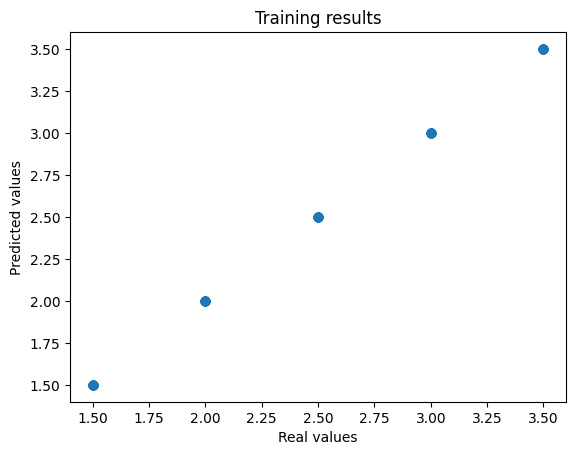

In [53]:
# TODO Evaluate the model using the model.evaluate() function
model.evaluate(X_test, y_test)

# TODO Make predictions
X_pred = np.array(X_test, dtype=np.float32)
y_pred = model.predict(X_pred)

# TODO Plot real vs predicted prices (hint: you can use the plotting code from above as a start)
plt.scatter(y_test, y_pred)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Training results')
plt.show()



# Step 8: Optional
Go back to the start and experiment what happens if instead of representing a price of a house costing onehundred thousand by a 1 we use the raw number 100,000 instead.

Try to explain what happened and why.